<a href="https://colab.research.google.com/github/NeuralDataMind/PyTorch/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

In [46]:
iris = load_iris()
X = iris.data
y = iris.target

In [47]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
X.shape, y.shape

((150, 4), (150,))

In [50]:
iris_df = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'X3': X[:, 2],
    'X4': X[:, 3],
    'y' : y
})

In [51]:
iris_df.head(10)

,X1,X2,X3,X4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [52]:
iris_df.y.value_counts()

,count
y,
0,50
1,50
2,50


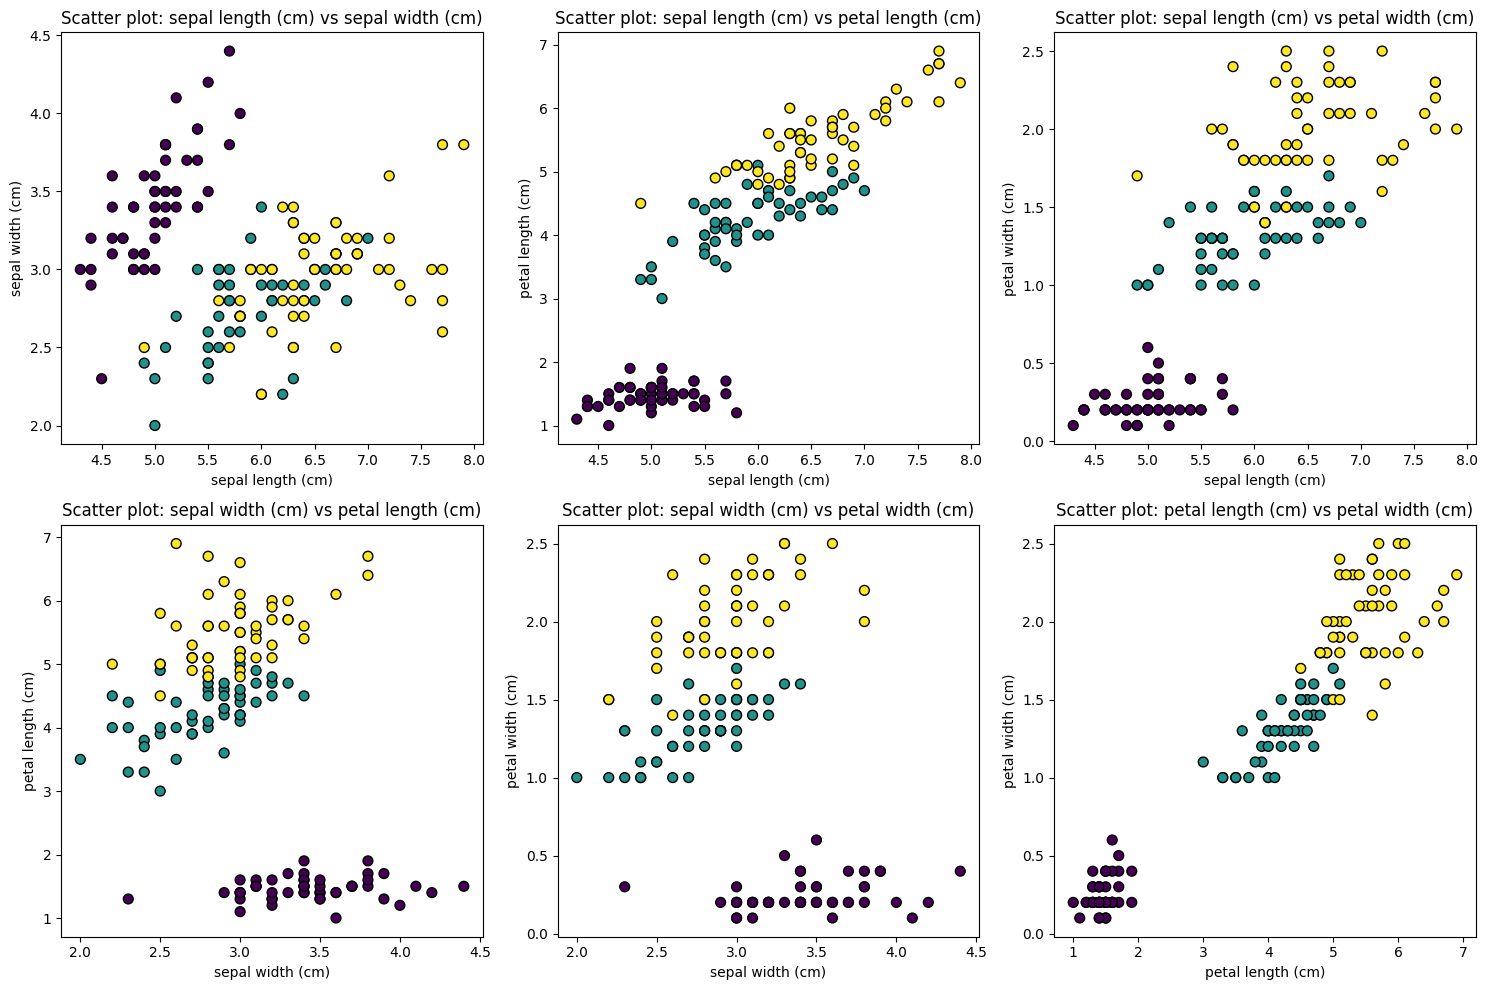

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for ax, features in zip(axes.flatten(), feature_combinations):
  feature1, feature2 = features
  ax.scatter(X[:, feature1], X[:, feature2], c=y, cmap='viridis', edgecolor='k', s=50)
  ax.set_xlabel(iris.feature_names[feature1])
  ax.set_ylabel(iris.feature_names[feature2])
  ax.set_title(f'Scatter plot: {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}')

plt.tight_layout()
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [57]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64).to(device)

In [58]:
class SimpleClassifier(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.layer_1 = nn.Linear(in_features, 120)
    self.layer_2 = nn.Linear(120, 10)
    self.layer_3 = nn.Linear(10, out_features)
  def forward(self, x):
    x = self.layer_3(self.layer_2(self.layer_1(x)))
    return x

In [59]:
in_features = X_train.shape[1]
num_classes = len(set(y))

model = SimpleClassifier(in_features, num_classes).to(device)

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [61]:
num_epochs = 1000

for epoch in range(num_epochs):
  model.train()

  # forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs,  y_train_tensor)

  _, predicted_labels = torch.max(outputs, 1)
  correct_predictions = (predicted_labels == y_train_tensor).sum().item()

  total_samples = len(y_train_tensor)
  acc = correct_predictions / total_samples

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 10 == 0:
    print(f'Epoch [{epoch + 1} / {num_epochs}], loss: {loss.item():.4f}, Accuracy: {acc:.4f}')

Epoch [10 / 1000], loss: 0.8951, Accuracy: 0.6500
Epoch [20 / 1000], loss: 0.7581, Accuracy: 0.6583
Epoch [30 / 1000], loss: 0.6665, Accuracy: 0.6583
Epoch [40 / 1000], loss: 0.6033, Accuracy: 0.6583
Epoch [50 / 1000], loss: 0.5575, Accuracy: 0.6667
Epoch [60 / 1000], loss: 0.5224, Accuracy: 0.6833
Epoch [70 / 1000], loss: 0.4940, Accuracy: 0.7167
Epoch [80 / 1000], loss: 0.4701, Accuracy: 0.7750
Epoch [90 / 1000], loss: 0.4492, Accuracy: 0.8083
Epoch [100 / 1000], loss: 0.4306, Accuracy: 0.8167
Epoch [110 / 1000], loss: 0.4138, Accuracy: 0.8250
Epoch [120 / 1000], loss: 0.3984, Accuracy: 0.8250
Epoch [130 / 1000], loss: 0.3842, Accuracy: 0.8417
Epoch [140 / 1000], loss: 0.3711, Accuracy: 0.8417
Epoch [150 / 1000], loss: 0.3589, Accuracy: 0.8583
Epoch [160 / 1000], loss: 0.3476, Accuracy: 0.8583
Epoch [170 / 1000], loss: 0.3370, Accuracy: 0.8833
Epoch [180 / 1000], loss: 0.3271, Accuracy: 0.8917
Epoch [190 / 1000], loss: 0.3177, Accuracy: 0.8917
Epoch [200 / 1000], loss: 0.3090, Accura

In [62]:
model.eval()
with torch.inference_mode():
  outputs = model(X_test_tensor)
  _, predicted = torch.max(outputs, 1)

  accuracy = accuracy_score(y_test, predicted.numpy())

  predicted_tensor = predicted.clone().detach()
  loss = criterion(outputs, predicted_tensor)

  print(f'Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.0613, Accuracy: 1.0000
